In [1]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump
from imblearn.over_sampling import SMOTE
from utils.drawing import *

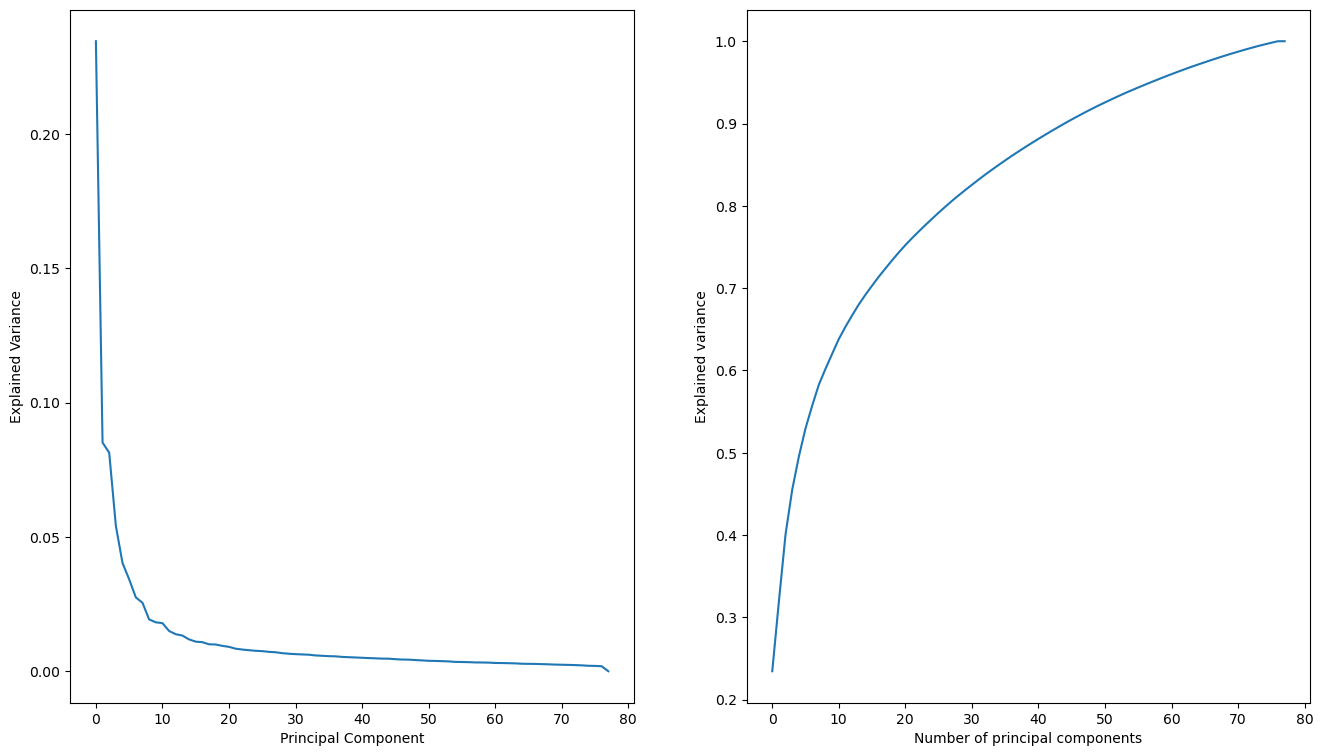

In [2]:
X_train, X_test, y_train, y_test, pca_names, df = load_preprocess_data('../../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                        ['samples','type'], 'type')

NO SMOTE

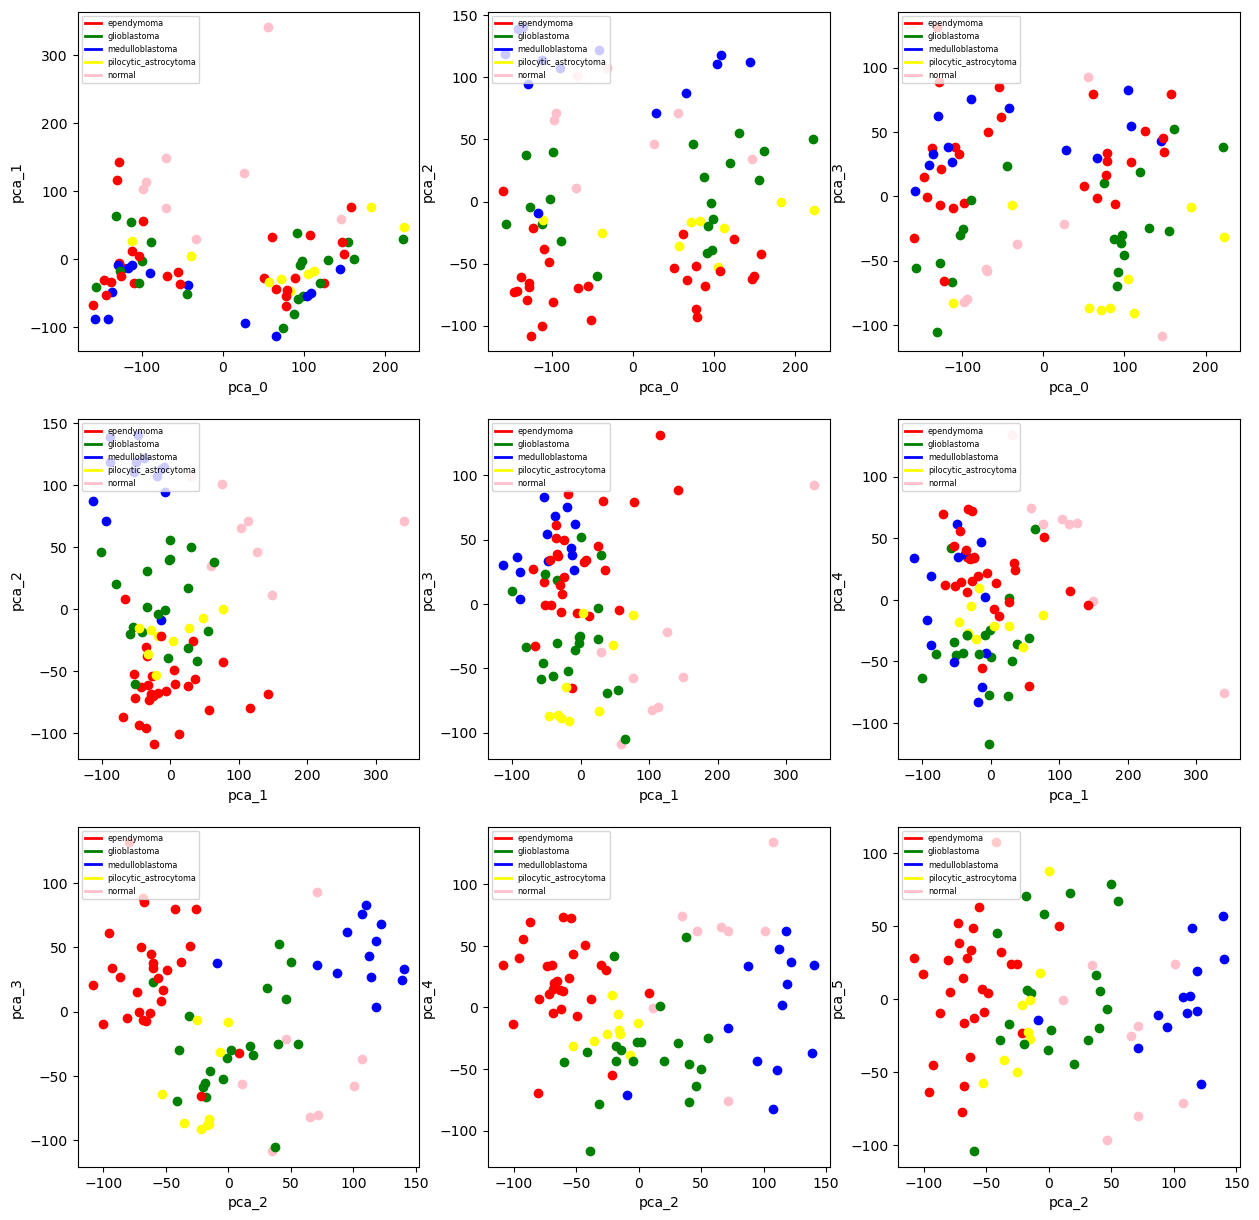

In [3]:
df_pca = pd.DataFrame(X_train, columns = pca_names)
print_classes(3,3,np.array(y_train),df_pca)

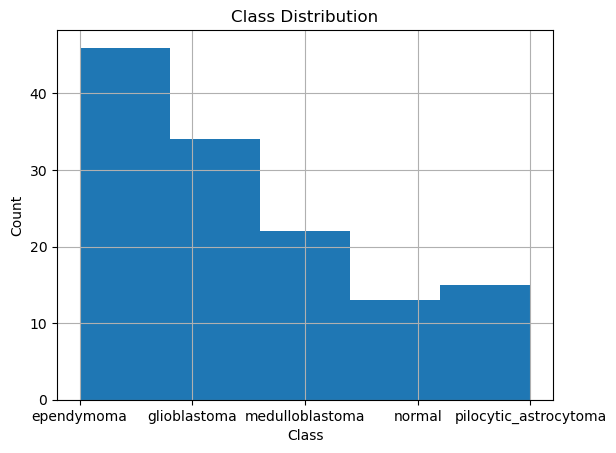

In [4]:
plot_class_distribution(df, 'type')

In [5]:
C = [0.001, 0.01, 0.1, 1, 10]
params = {
    'C' : C,
    'kernel': ['linear', 'rbf'],
    'gamma' : ['scale', 'auto']
}
estimator_NO_SMOTE = GridSearchCV(SVC(), param_grid= params, cv= 5, verbose= 3)

In [6]:
estimator_NO_SMOTE.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.001, gamma=scale, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.001, gamma=scale, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END C=0.001, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=0.001, gamma=scale, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.001, gamma=scale, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.312 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.312 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.400 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/5] END C=0.001, gamma=auto, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.001, gamma=auto, kernel=l

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [7]:
estimator_NO_SMOTE.best_params_

{'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}

In [8]:
y_predict_NO_SMOTE = estimator_NO_SMOTE.best_estimator_.predict(X_test)
accuracy_score_NO_SMOTE = accuracy_score(y_predict_NO_SMOTE, y_test)
f1_score_NO_SMOTE = f1_score(y_predict_NO_SMOTE, y_test, average='weighted')
print(accuracy_score_NO_SMOTE, f1_score_NO_SMOTE)

0.9807692307692307 0.981003276642222


CONFUSION MATRIX


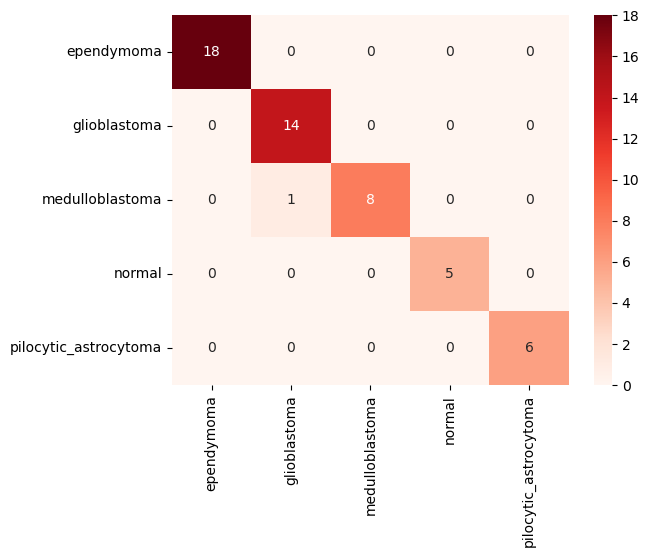

In [9]:
data = confusion_matrix(y_test, y_predict_NO_SMOTE)
print("CONFUSION MATRIX")
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

In [10]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

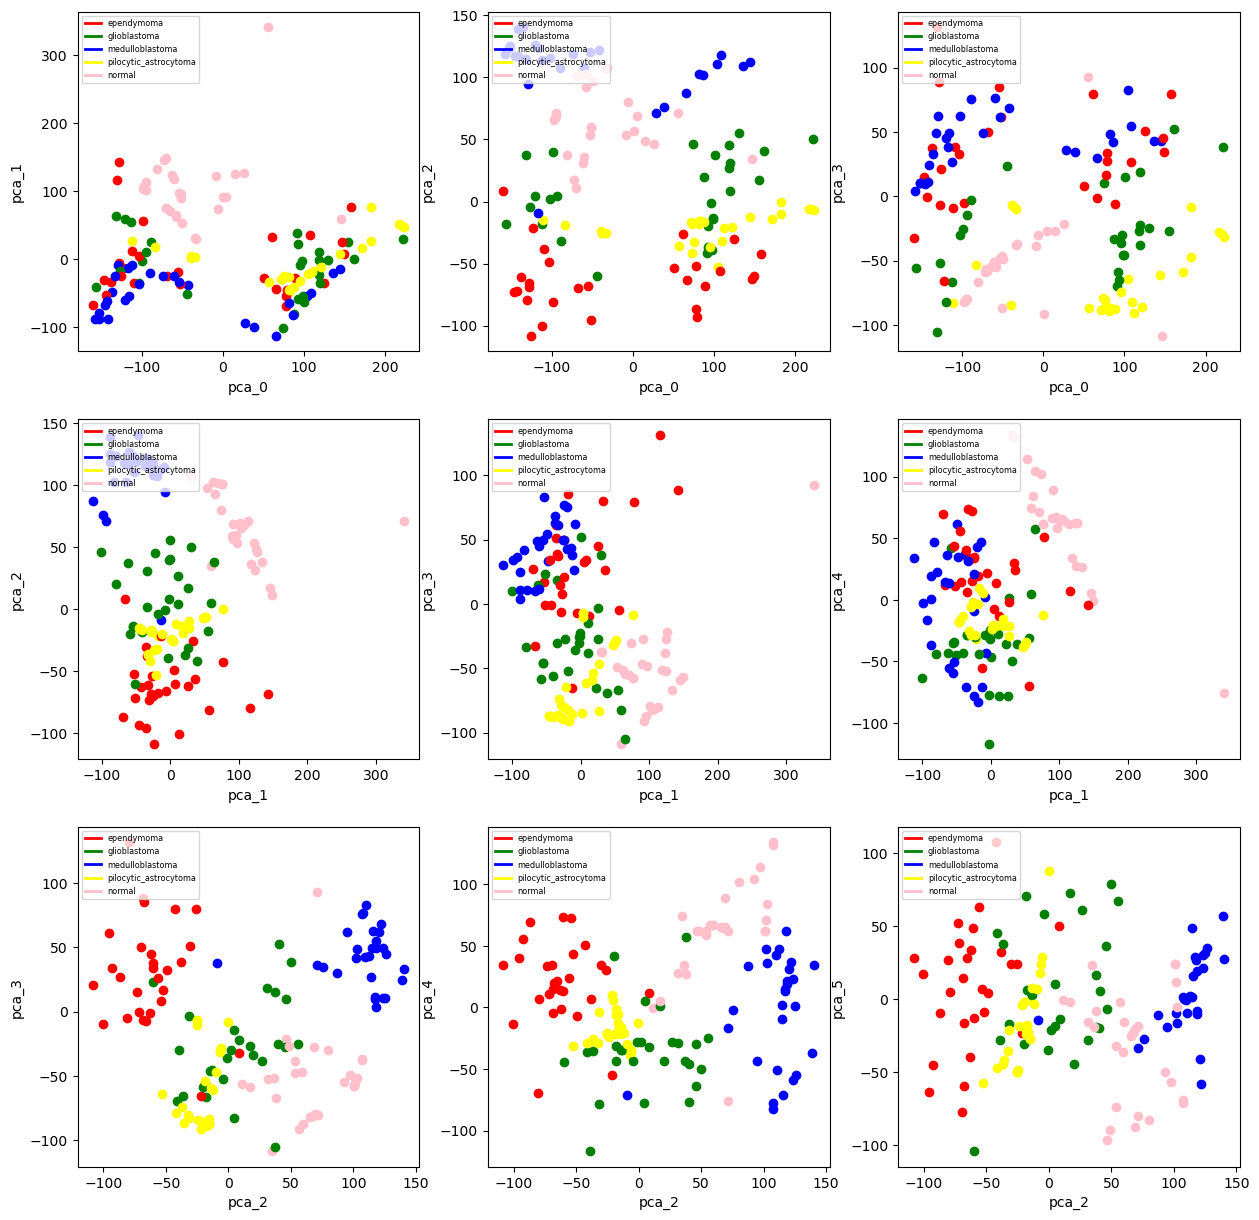

In [11]:
df_pca_SMOTE = pd.DataFrame(X_train_smote, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train_smote) , df_pca_SMOTE)

In [12]:
estimator_SMOTE = GridSearchCV(SVC(), param_grid= params, cv= 5, verbose= 3)
estimator_SMOTE.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.001, gamma=scale, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END C=0.001, gamma=scale, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END C=0.001, gamma=scale, kernel=linear;, score=0.964 total time=   0.0s
[CV 4/5] END C=0.001, gamma=scale, kernel=linear;, score=0.964 total time=   0.0s
[CV 5/5] END C=0.001, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.321 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.321 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.286 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.357 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END C=0.001, gamma=auto, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END C=0.001, gamma=auto, kernel=l

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [13]:
estimator_SMOTE.best_params_

{'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}

In [14]:
y_predict_SMOTE = estimator_SMOTE.best_estimator_.predict(X_test)
accuracy_score_SMOTE = accuracy_score(y_predict_SMOTE, y_test)
f1_score_SMOTE = f1_score(y_predict_SMOTE, y_test, average='weighted')
print(accuracy_score_SMOTE, f1_score_SMOTE)


0.9807692307692307 0.981003276642222


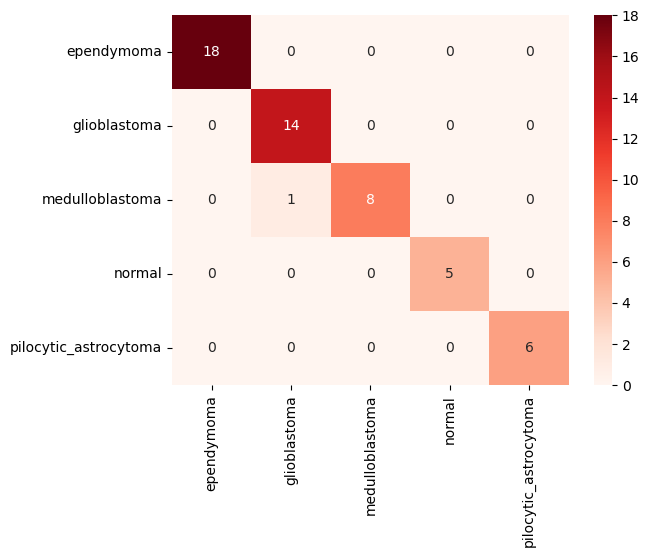

In [15]:
data = confusion_matrix(y_test, y_predict_SMOTE)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

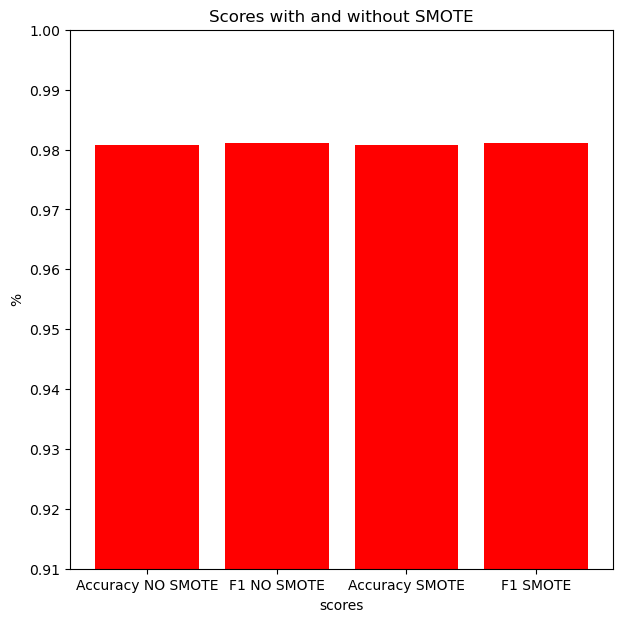

In [16]:
labels = ['Accuracy NO SMOTE', 'F1 NO SMOTE', 'Accuracy SMOTE', 'F1 SMOTE']
values = [accuracy_score_NO_SMOTE,f1_score_NO_SMOTE,accuracy_score_SMOTE,f1_score_SMOTE]
plt.figure(figsize=(7,7))
plt.bar(labels, values, color = 'red')
#plt.grid(alpha=0.9)
plt.ylim(0.91, 1)
plt.xlabel('scores')
plt.ylabel('%')
plt.title('Scores with and without SMOTE')
plt.show()

<BarContainer object of 5 artists>

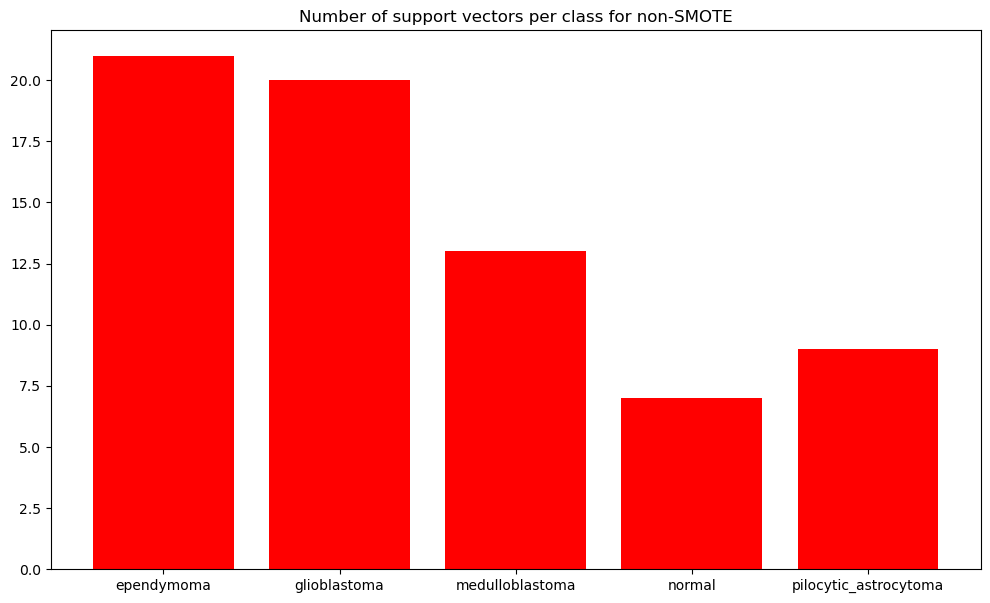

In [33]:
num_supp_NO_SMOTE = estimator_NO_SMOTE.best_estimator_.n_support_
plt.figure(figsize=(12,7))
plt.title("Number of support vectors per class for non-SMOTE")
plt.bar(df['type'].unique(), num_supp_NO_SMOTE, color = 'red')

<BarContainer object of 5 artists>

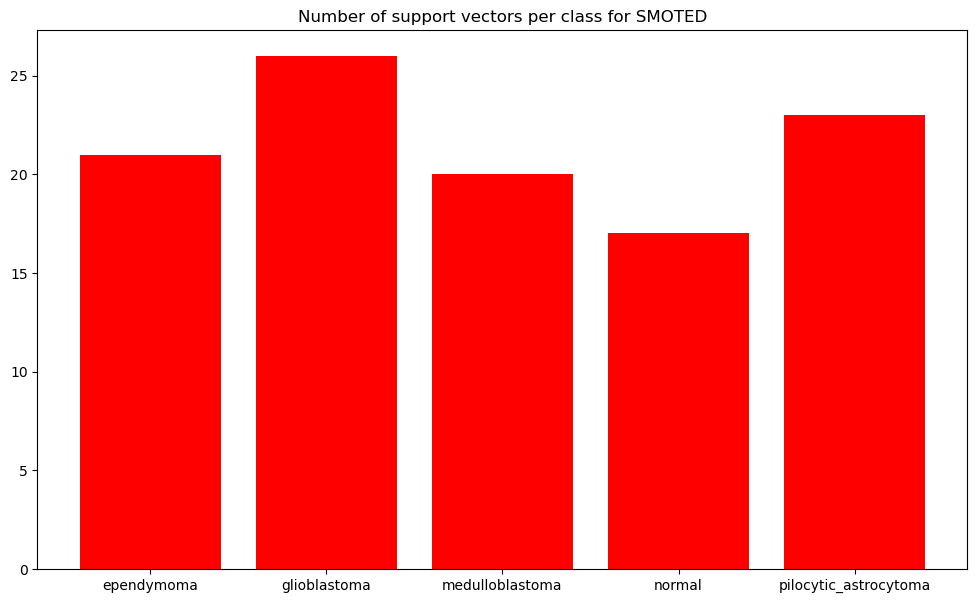

In [40]:
num_supp_SMOTE = estimator_SMOTE.best_estimator_.n_support_
plt.figure(figsize=(12,7))
plt.title("Number of support vectors per class for SMOTED")
plt.bar(df['type'].unique(), num_supp_SMOTE, color = 'red')

In [47]:
dump(estimator_NO_SMOTE.best_estimator_, 'svm_no_smote.pkl')
dump(estimator_SMOTE.best_estimator_, 'svm_smote.pkl')

['svm_smote.pkl']